<a href="https://colab.research.google.com/github/Kanak-a/sem7/blob/main/dmv_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: 06

## Aim: Analyzing Sales Performance by Region in a Retail Company

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Retail_Sales.csv')

In [ ]:
df.head()

,customer_id,Product_category,quantity_sold,Sales_Amount,transaction_date,Region
0,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,C189076,Books,4,60.60,24-10-2021,Kanyon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       149 non-null    object 
 1   Product_category  149 non-null    object 
 2   quantity_sold     149 non-null    int64  
 3   Sales_Amount      149 non-null    float64
 4   transaction_date  149 non-null    object 
 5   Region            149 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.1+ KB


In [ ]:
df.describe()

,quantity_sold,Sales_Amount
count,149.000000,149.000000
mean,3.174497,757.700671
std,1.393671,1024.976929
min,1.000000,5.230000
25%,2.000000,58.650000
50%,3.000000,300.080000
75%,4.000000,1200.320000
max,5.000000,5250.000000


## To identify relevant variables -


*   **Region**: To group data by region
*   **Sales_Amount**: To calculate total sales for each region
*   **Product_Category:** To further analyze sales based on product categories



###Group Sales Data by Region


> We'll group the data by the Region column and calculate the total sales amount for each region.


In [ ]:
sales_by_region = df.groupby('Region')['Sales_Amount'].sum().reset_index()

In [ ]:
sales_by_region = sales_by_region.sort_values(by='Sales_Amount', ascending=False)

In [ ]:
sales_by_region

,Region,Sales_Amount
4,Kanyon,33388.01
5,Mall of Istanbul,18636.46
6,Metrocity,13662.51
7,Metropol AVM,10751.48
8,Viaport Outlet,8267.10
1,Emaar Square Mall,7320.50
2,Forum Istanbul,6836.64
9,Zorlu Center,6571.49
0,Cevahir AVM,5300.86
3,Istinye Park,2162.35


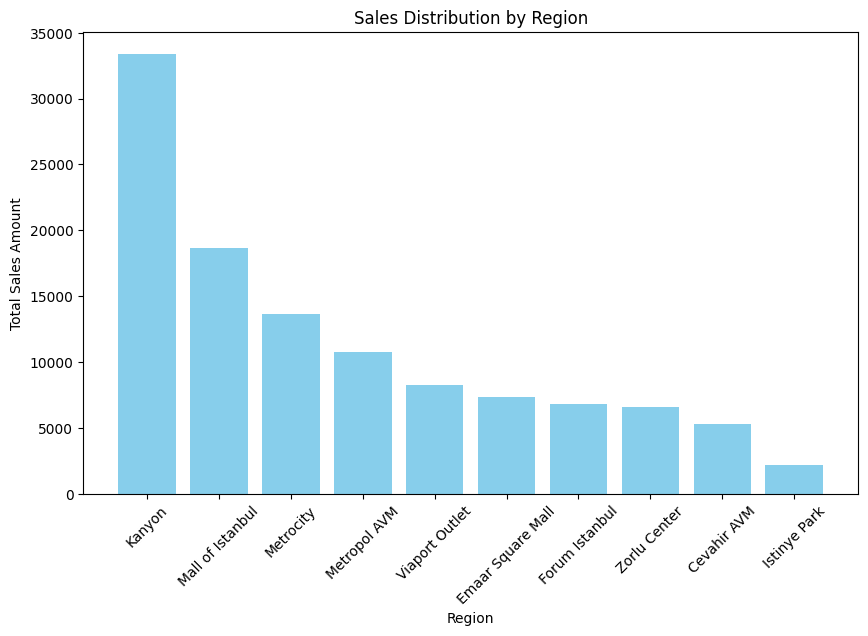

In [ ]:
import matplotlib.pyplot as plt

# Bar plot to visualize the sales distribution by region
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['Region'], sales_by_region['Sales_Amount'], color='skyblue')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

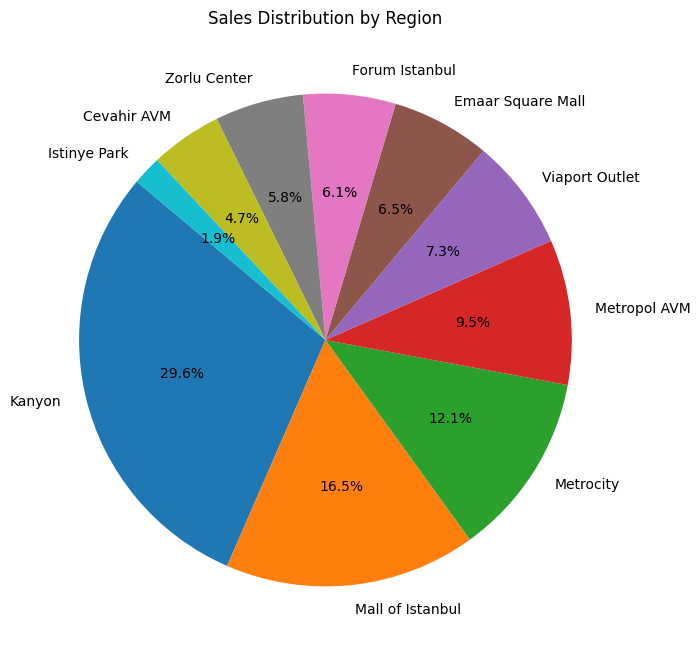

In [ ]:
# Pie chart to visualize the sales distribution by region
plt.figure(figsize=(8, 8))
plt.pie(sales_by_region['Sales_Amount'], labels=sales_by_region['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.show()

In [ ]:
# Get the top-performing region(s) based on the highest sales amount
top_regions = sales_by_region.head(3)  # Display top 3 for simplicity
print("Top-Performing Regions:")
print(top_regions)

Top-Performing Regions:
             Region  Sales_Amount
4            Kanyon      33388.01
5  Mall of Istanbul      18636.46
6         Metrocity      13662.51


### Group Sales Data by Region and Product Category



> we'll further break down the sales by both Region and Product_Category to see the total sales amount for each combination.







In [ ]:
# Group the data by 'Region' and 'Product_category' and calculate the total sales amount for each combination
sales_by_region_category = df.groupby(['Region', 'Product_category'])['Sales_Amount'].sum().unstack()

In [ ]:
sales_by_region_category

Product_category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
Region,,,,,,,,
Cevahir AVM,NaN,3300.88,NaN,20.92,1800.51,35.19,NaN,143.36
Emaar Square Mall,15.15,1500.40,203.30,20.92,5401.53,NaN,NaN,179.20
Forum Istanbul,75.75,1800.48,NaN,15.69,4801.36,NaN,NaN,143.36
Istinye Park,45.45,1500.40,406.60,20.92,NaN,117.30,NaN,71.68
Kanyon,166.65,16504.40,243.96,52.30,6601.87,82.11,9450.0,286.72
Mall of Istanbul,NaN,9602.56,325.28,99.37,3000.85,NaN,5250.0,358.40
Metrocity,212.10,3300.88,772.54,88.91,4801.36,NaN,4200.0,286.72
Metropol AVM,NaN,5401.44,243.96,5.23,3000.85,NaN,2100.0,NaN
Viaport Outlet,NaN,2100.56,NaN,15.69,3000.85,NaN,3150.0,NaN


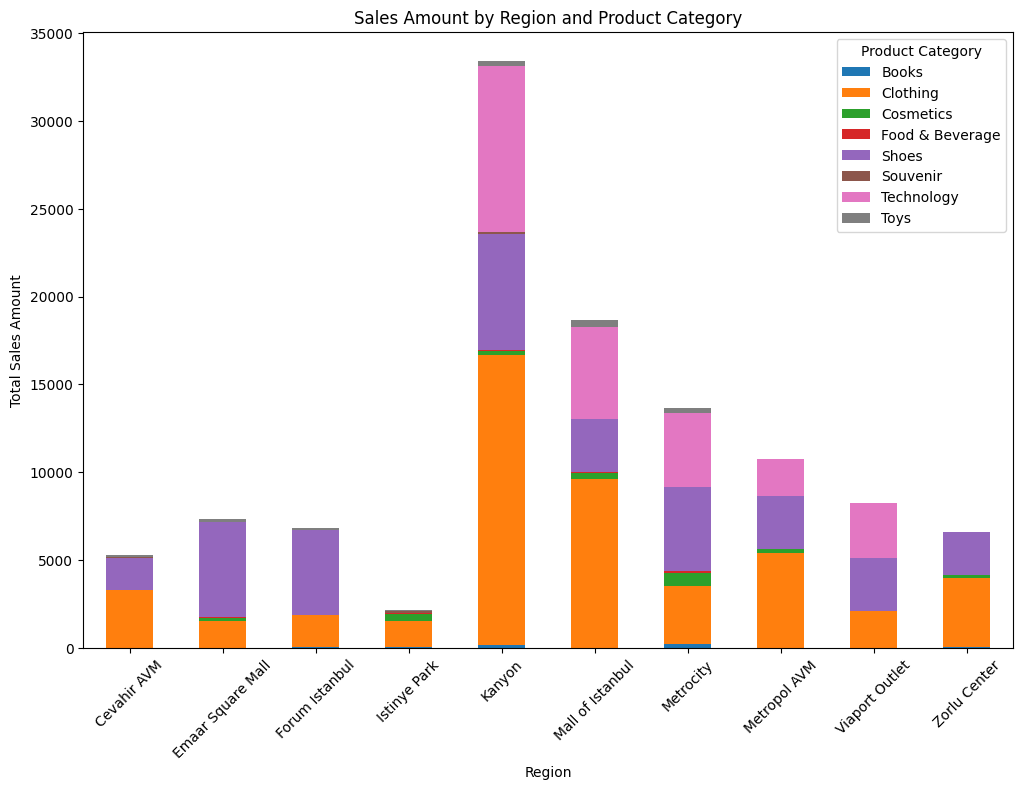

In [ ]:
# Stacked bar plot to compare sales across regions and product categories
sales_by_region_category.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

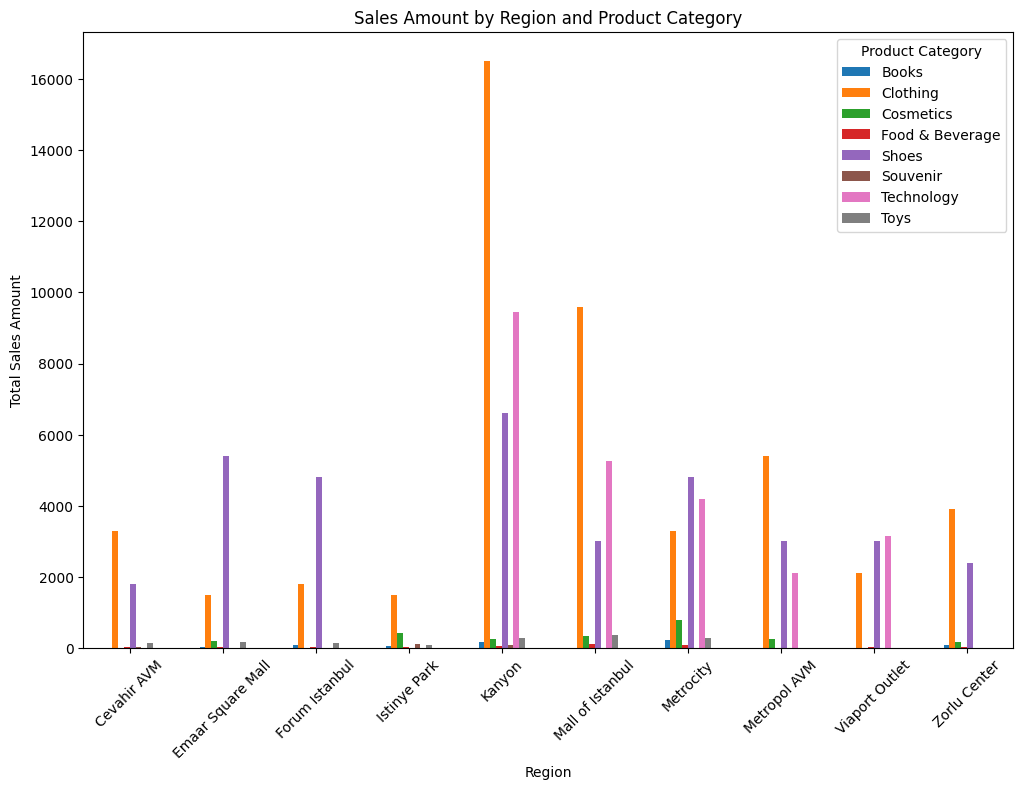

In [ ]:
# Grouped bar plot to compare sales across regions and product categories
sales_by_region_category.plot(kind='bar', figsize=(12, 8))
plt.title('Sales Amount by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()